# Lab 8
# Python for Financial Applications

--------------
In this section, we are going to learn how to use Pandas package to calculate staff salaries and create different types of charts.
By finishing this section, you will be able to:
- Retrieve the content of the CSV files and create data frames.
- Perform calculation with DataFrame.
- Create summaries using Pivot Table.
- Plot graphs.


------------
## *Downloading the Data Files* ##
Download the files **door_access_records.csv** and **hourly_rates.csv** from the BU eLearning web site and save them with your working directory.

------------
## *Importing Required Library* ##
Add the following lines to import the libraries:

In [1]:
import pandas as pd
import numpy as np

------------
## *Creating a Data Frame with the CSV File Content* ##
Firstly, we have to load the data from the data file and create a data frame.

1.	Load the door access records from the file named **door_access_records.csv** and create a data frame named **records**. The **pd.read_csv()** function accepts a file name and returns a data frame. Add the following line to create a data frame.

In [2]:
records = pd.read_csv('door_access_records.csv')

#The data is stored in the records data frame as follows:
records

,Date,Staff Name,Department,Working Hours (In & Out)
0,6/15/2018,Jacky Lee,IT,6:12-20:44
1,6/15/2018,Joyce Ho,Human Resources,8:26-19:51
2,6/15/2018,Ivy Chu,Sales,8:29-18:44
3,6/15/2018,David Chan,Purchasing,8:33-19:50
4,6/15/2018,Gary Yuen,Logistics,8:34-19:45
...,...,...,...,...
185,6/28/2018,Eric Kwong,Marketing,10:35-18:22
186,6/28/2018,Wendy Man,Sales,10:39-18:23
187,6/28/2018,Ceila Fong,Marketing,10:40-18:30
188,6/28/2018,Sophia Li,Logistics,10:54-20:09


2.	Load the hourly salary rates from another file named **hourly_rates.csv** and create a data frame named **hourly_rates**.

In [3]:
#With the index_col parameter, we set the column ‘Staff Name’ as an index.
hourly_rate = pd.read_csv('hourly_rate.csv', index_col = 'Staff Name')

#The data is stored in the hourly_rates data frame as follows:
hourly_rate 

,Salary Rate (per hour)
Staff Name,
Jacky Lee,60
Joyce Ho,70
Ivy Chu,55
David Chan,65
Gary Yuen,75
Heather Ho,85
Andy Tsang,65
Lily Lo,75
Wendy Man,60


------------
## *Computing the Working Hours* ##
In the records data frame, the “Working Hours (In & Out)” column does not really store the working hours. 

It stores the IN time and OUT time of the staffs on individual days. The IN time and OUT time are stored in the same column with a minus sign as a separator. 

Now, we split the values and use them to compute the working hours. The following formula are used to compute the working hours:

> Working Hours = (Minute(Out Time) - Minute(In Time)) / 60


3.	Split the “Working Hours (In & Out)” column by using the str.split() function. We temporarily store the values in two sets of Series – in_time and out_time.

In [4]:
in_time, out_time = records['Working Hours (In & Out)'].str.split('-').str

The **str.split()** function accepts a string for splitting the values. In this example, we use a minus sign. And, we use **.str** to convert the results to string format. Now, in_time and out_time store time strings respectively.

4.	Store the string versions of **IN** time and **OUT** time in the records data frame. 

In [5]:
records['In'] = in_time
records['Out'] = out_time

#The records data frame has two more columns now.
records

,Date,Staff Name,Department,Working Hours (In & Out),In,Out
0,6/15/2018,Jacky Lee,IT,6:12-20:44,6:12,20:44
1,6/15/2018,Joyce Ho,Human Resources,8:26-19:51,8:26,19:51
2,6/15/2018,Ivy Chu,Sales,8:29-18:44,8:29,18:44
3,6/15/2018,David Chan,Purchasing,8:33-19:50,8:33,19:50
4,6/15/2018,Gary Yuen,Logistics,8:34-19:45,8:34,19:45
...,...,...,...,...,...,...
185,6/28/2018,Eric Kwong,Marketing,10:35-18:22,10:35,18:22
186,6/28/2018,Wendy Man,Sales,10:39-18:23,10:39,18:23
187,6/28/2018,Ceila Fong,Marketing,10:40-18:30,10:40,18:30
188,6/28/2018,Sophia Li,Logistics,10:54-20:09,10:54,20:09


5.	Convert the values stored in **in_time** and **out_time** to the **datetime** format, so as to compute the time differences.

In [6]:
#The to_datetime() function returns a datetime object of the time string. 
in_time = pd.to_datetime(in_time)
out_time = pd.to_datetime(out_time)

6.	Then, we subtract the OUT time by the IN time to get the working hours. The results of the subtraction are in **timedelta** object format.

In [7]:
working_hours = out_time - in_time
working_hours

0     14:32:00
1     11:25:00
2     10:15:00
3     11:17:00
4     11:11:00
        ...   
185   07:47:00
186   07:44:00
187   07:50:00
188   09:15:00
189   07:45:00
Name: Working Hours (In & Out), Length: 190, dtype: timedelta64[ns]

7.	Use the **astype()** function with the option **timedelta64[m]** to retrieve the number of minutes representing in float format.

In [8]:
working_hours = working_hours.astype('timedelta64[m]')
working_hours

0      872.0
1      685.0
2      615.0
3      677.0
4      671.0
       ...  
185    467.0
186    464.0
187    470.0
188    555.0
189    465.0
Name: Working Hours (In & Out), Length: 190, dtype: float64

8.	Convert the working hours from minutes to hours and round the results down to two decimal places. Add the working hours to the records DataFrame as a new column named “Working Hours”.

In [9]:
working_hours = round(working_hours/60, 2)
records['Working Hours'] = working_hours

9.	Delete the “Working Hours (In & Out)” column because it is no longer necessary.

In [10]:
records.drop('Working Hours (In & Out)', axis=1, inplace=True)

#We now have the records data frame as follows:
records

,Date,Staff Name,Department,In,Out,Working Hours
0,6/15/2018,Jacky Lee,IT,6:12,20:44,14.53
1,6/15/2018,Joyce Ho,Human Resources,8:26,19:51,11.42
2,6/15/2018,Ivy Chu,Sales,8:29,18:44,10.25
3,6/15/2018,David Chan,Purchasing,8:33,19:50,11.28
4,6/15/2018,Gary Yuen,Logistics,8:34,19:45,11.18
...,...,...,...,...,...,...
185,6/28/2018,Eric Kwong,Marketing,10:35,18:22,7.78
186,6/28/2018,Wendy Man,Sales,10:39,18:23,7.73
187,6/28/2018,Ceila Fong,Marketing,10:40,18:30,7.83
188,6/28/2018,Sophia Li,Logistics,10:54,20:09,9.25


----------
## *Computing the Daily Wages* ##
To compute the daily wages, we need the hourly salary rate of each staff. After that we use the following formula to compute the daily wages.

> Daily Wages = Working Hours * Hourly Salary Rate


10.	Look up the hourly salary rates for individual staffs by merging two data frames.

In [11]:
records = pd.merge(records, hourly_rate, how='left', left_on='Staff Name', right_index=True)

In the statement above, we provide the **merge()** function many things including:
- **records, hourly_rate** – two source data frames. The **records** data frame is on left-hand side, the **hourly_rate** data frame is on right-hand side.
- **how='left'** – use left join method to merge the data. The merged result includes all rows of the left-hand side but some rows of right-hand side may not be included.
- **left_on='Staff Name'** – the left-hand side, use the ‘Staff Name’ column for merging.
- **right_index=True** – the right-hand side, use the index column for merging.

In [12]:
#After the merging, the records data frame stores the data as follows:
records

,Date,Staff Name,Department,In,Out,Working Hours,Salary Rate (per hour)
0,6/15/2018,Jacky Lee,IT,6:12,20:44,14.53,60
1,6/15/2018,Joyce Ho,Human Resources,8:26,19:51,11.42,70
2,6/15/2018,Ivy Chu,Sales,8:29,18:44,10.25,55
3,6/15/2018,David Chan,Purchasing,8:33,19:50,11.28,65
4,6/15/2018,Gary Yuen,Logistics,8:34,19:45,11.18,75
...,...,...,...,...,...,...,...
185,6/28/2018,Eric Kwong,Marketing,10:35,18:22,7.78,70
186,6/28/2018,Wendy Man,Sales,10:39,18:23,7.73,60
187,6/28/2018,Ceila Fong,Marketing,10:40,18:30,7.83,80
188,6/28/2018,Sophia Li,Logistics,10:54,20:09,9.25,70


11.	Compute the daily wages using the columns “Working Hours” and “Salary Rate (per hour)”.

In [13]:
records['Daily Wage'] = records['Salary Rate (per hour)'] * records['Working Hours']

12.	Sort the rows by “Working Hours” and “Staff Name” in *descending* order. The result is stored back in the *records* data frame.

In [14]:
records.sort_values(by = ['Working Hours', 'Staff Name'], ascending = False, inplace = True)

#Now records become:
records

,Date,Staff Name,Department,In,Out,Working Hours,Salary Rate (per hour),Daily Wage
0,6/15/2018,Jacky Lee,IT,6:12,20:44,14.53,60,871.80
19,6/18/2018,Joyce Ho,Human Resources,8:04,20:54,12.83,70,898.10
116,6/25/2018,Alan Chan,Account,8:10,20:59,12.82,60,769.20
39,6/19/2018,Andy Tsang,Purchasing,8:16,20:59,12.72,65,826.80
77,6/21/2018,Ivy Chu,Sales,8:12,20:51,12.65,55,695.75
...,...,...,...,...,...,...,...,...
169,6/27/2018,Brad Fu,Account,10:54,18:33,7.65,85,650.25
15,6/15/2018,Alan Chan,Account,10:24,18:02,7.63,60,457.80
36,6/18/2018,Jacky Lee,IT,10:38,18:04,7.43,60,445.80
93,6/21/2018,Eric Kwong,Marketing,10:49,18:03,7.23,70,506.10


## *Creating Summaries using Pivot Table*
Pivot Table is a very useful and powerful feature which can be used to summarize, analyze, explore and present our data. We could use a Pivot Table to produce meaningful information from a large table of information, such as:
- The total and daily working hours for each staff
- The total and average working hours for each staff in each department
- The total and average working hours of all staff in each department
- The total and average working hours for each staff


13.	Create a pivot table named table1 that contains the total working hours for each staff.


In [15]:
table1 = pd.pivot_table(records, values = 'Working Hours', index = 'Staff Name', aggfunc = np.sum)

table1

,Working Hours
Staff Name,
Alan Chan,92.45
Andy Tsang,101.18
Brad Fu,104.27
Ceila Fong,99.00
David Chan,100.26
Eric Kwong,97.14
Gary Yuen,94.27
Heather Ho,106.33
Ivy Chu,102.90


14.	Create a pivot table named table2 that contains the daily working hours grouped by the departments.

In [16]:
table2 = pd.pivot_table(records, values = 'Working Hours', index = 'Department', columns='Date',  aggfunc = np.sum)

table2

Date,6/15/2018,6/18/2018,6/19/2018,6/20/2018,6/21/2018,6/22/2018,6/25/2018,6/26/2018,6/27/2018,6/28/2018
Department,,,,,,,,,,
Account,17.91,18.76,18.65,19.80,19.27,19.70,23.34,19.43,17.68,22.18
Human Resources,19.75,24.91,19.52,20.07,19.60,19.42,19.84,18.13,19.01,17.55
IT,22.93,27.78,30.23,30.71,31.16,28.92,31.36,32.19,29.35,29.53
Logistics,30.53,17.09,23.30,19.11,18.28,18.95,20.18,20.18,20.13,18.58
Marketing,31.06,31.08,29.35,31.50,25.99,33.92,30.60,29.50,30.28,25.03
Purchasing,32.55,31.75,31.48,26.95,30.18,32.94,31.56,30.30,29.13,30.93
Sales,41.85,39.73,39.07,36.55,40.96,41.94,40.10,43.20,39.94,41.08


15.	Create a pivot table named table3 that contains the total working hours and the total wages, average wages, minimum and maximum daily wages for each staff.

In [17]:
table3 = pd.pivot_table(records, values = ['Working Hours', 'Daily Wage'], index = 'Staff Name', 
    aggfunc = {'Working Hours':[min, max, np.mean, np.sum], 'Daily Wage':np.sum})

table3

Daily Wage Working Hours                      
                     sum           max    mean   min     sum
Staff Name                                                  
Alan Chan        5547.00         12.82   9.245  7.63   92.45
Andy Tsang       6576.70         12.72  10.118  7.83  101.18
Brad Fu          8862.95         11.77  10.427  7.65  104.27
Ceila Fong       7920.00         11.28   9.900  7.83   99.00
David Chan       6516.90         11.65  10.026  7.70  100.26
Eric Kwong       6799.80         11.37   9.714  7.23   97.14
Gary Yuen        7070.25         11.18   9.427  7.67   94.27
Heather Ho       9038.05         12.10  10.633  8.48  106.33
Ivy Chu          5659.50         12.65  10.290  7.77  102.90
Jacky Lee        6244.20         14.53  10.407  7.43  104.07
Johnathan Yip    4107.60         11.98  10.269  8.40  102.69
Joyce Ho         6891.50         12.83   9.845  7.18   98.45
Kitty Wong       4470.75         12.08   9.935  8.20   99.35
Lily Lo          7708.50         11.72  10.278  9.02  102.78
Mandy Tong       7151.90         11.27  10.217  9.42  102.17
Peter Leung      8926.20         11.65   9.918  9.02   99.18
Sophia Li        7097.30         12.42  10.139  8.68  101.39
Tom Ng           5884.20         11.17   9.807  7.75   98.07
Wendy Man        5973.60         11.62   9.956  7.73   99.56

16.	Create a pivot table named table4 that contains the total wages and working hours grouped by the departments. In addition, we rename the columns by using the **rename()** function.

In [18]:
table4 = pd.pivot_table(records, values = ['Daily Wage', 'Working Hours'], index = 'Department', 
    aggfunc = np.sum)

table4.rename(columns={'Daily Wage':'Total salary', 'Working Hours':'Total Working Hours'}, inplace = True)

table4

,Total salary,Total Working Hours
Department,,
Account,14409.95,196.72
Human Resources,11362.25,197.80
IT,15595.80,294.16
Logistics,14807.75,206.33
Marketing,21871.70,298.31
Purchasing,22131.65,307.77
Sales,28267.80,404.42


## *Creating Charts* ##
After generating the pivot tables, we could create charts to show the distribution of the working hours among all departments, total working hours of each staff in the period, etc. **Pandas’ DataFrame** provides the **plot()** function for creating charts. 
The **plot()** function provides many options for us to create different charts. The commonly used options (parameters) are:

- x: label of x axis. If not specify, the index column will be used.
- y: label of y axis.
- kind:  the kind of the chart including:
    - ‘line’ : line plot (default)
    - ‘bar’ : vertical bar plot
    - ‘barh’ : horizontal bar plot
    - ‘hist’ : histogram
    - ‘box’ : boxplot
    - ‘kde’ : Kernel Density Estimation plot
    - ‘density’ : same as ‘kde’
    - ‘area’ : area plot
    - ‘pie’ : pie plot
    - ‘scatter’ : scatter plot
    - ‘hexbin’ : hexbin plot
- ax: matplotlib axes object. 
- title: add the title to the chart.
- legend: hide, show or reverse the legend.


17. Create a vertical bar chart using the data of **table1** with parameters – *kind = ‘bar’ and legend = False:*

In [19]:
table1.plot(kind='bar', legend = False)

18.	Create a horizontal bar chart using the data of **table2** with parameters – *title = ‘Working Hours in Different Departments’ and kind = ‘barh’*.

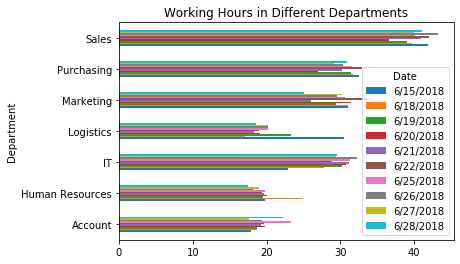

In [20]:
table2.plot(title = 'Working Hours in Different Departments', kind = 'barh')

19.	Create a pie chart using the data in the column “Total Working Hours” of **table4** with parameters – *kind = ‘pie’, y = ‘Total Working Hours’ and legend = False*:

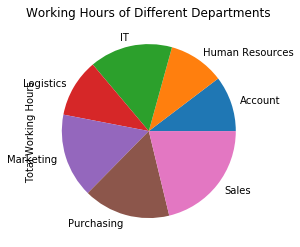

In [21]:
table4.plot(title = 'Working Hours of Different Departments', kind = 'pie', y = 'Total Working Hours', legend = False)